# Предсказание оттока клиентов

https://www.kaggle.com/competitions/advanced-dls-spring-2021

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score


## Загрузка данных


In [ ]:
df = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data = df.copy()

data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заменим весь мусор на None

In [ ]:
for col in data:
    if data[col].dtype == object:
        data[col] = data[col].apply(func=lambda x: None if (x is None or str.isspace(x) or not x) else x)
    

data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,None,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,None,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,None,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,None,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,None,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,None,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,None,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,None,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,None,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
data['TotalSpent'].fillna(data['MonthlySpending'], inplace=True)

data[data.isna().any(axis=1)]


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


Все численный колонки преобразуем во float

In [ ]:
for col in num_cols:
    data[col] = data[col].apply(float)


## Анализ данных

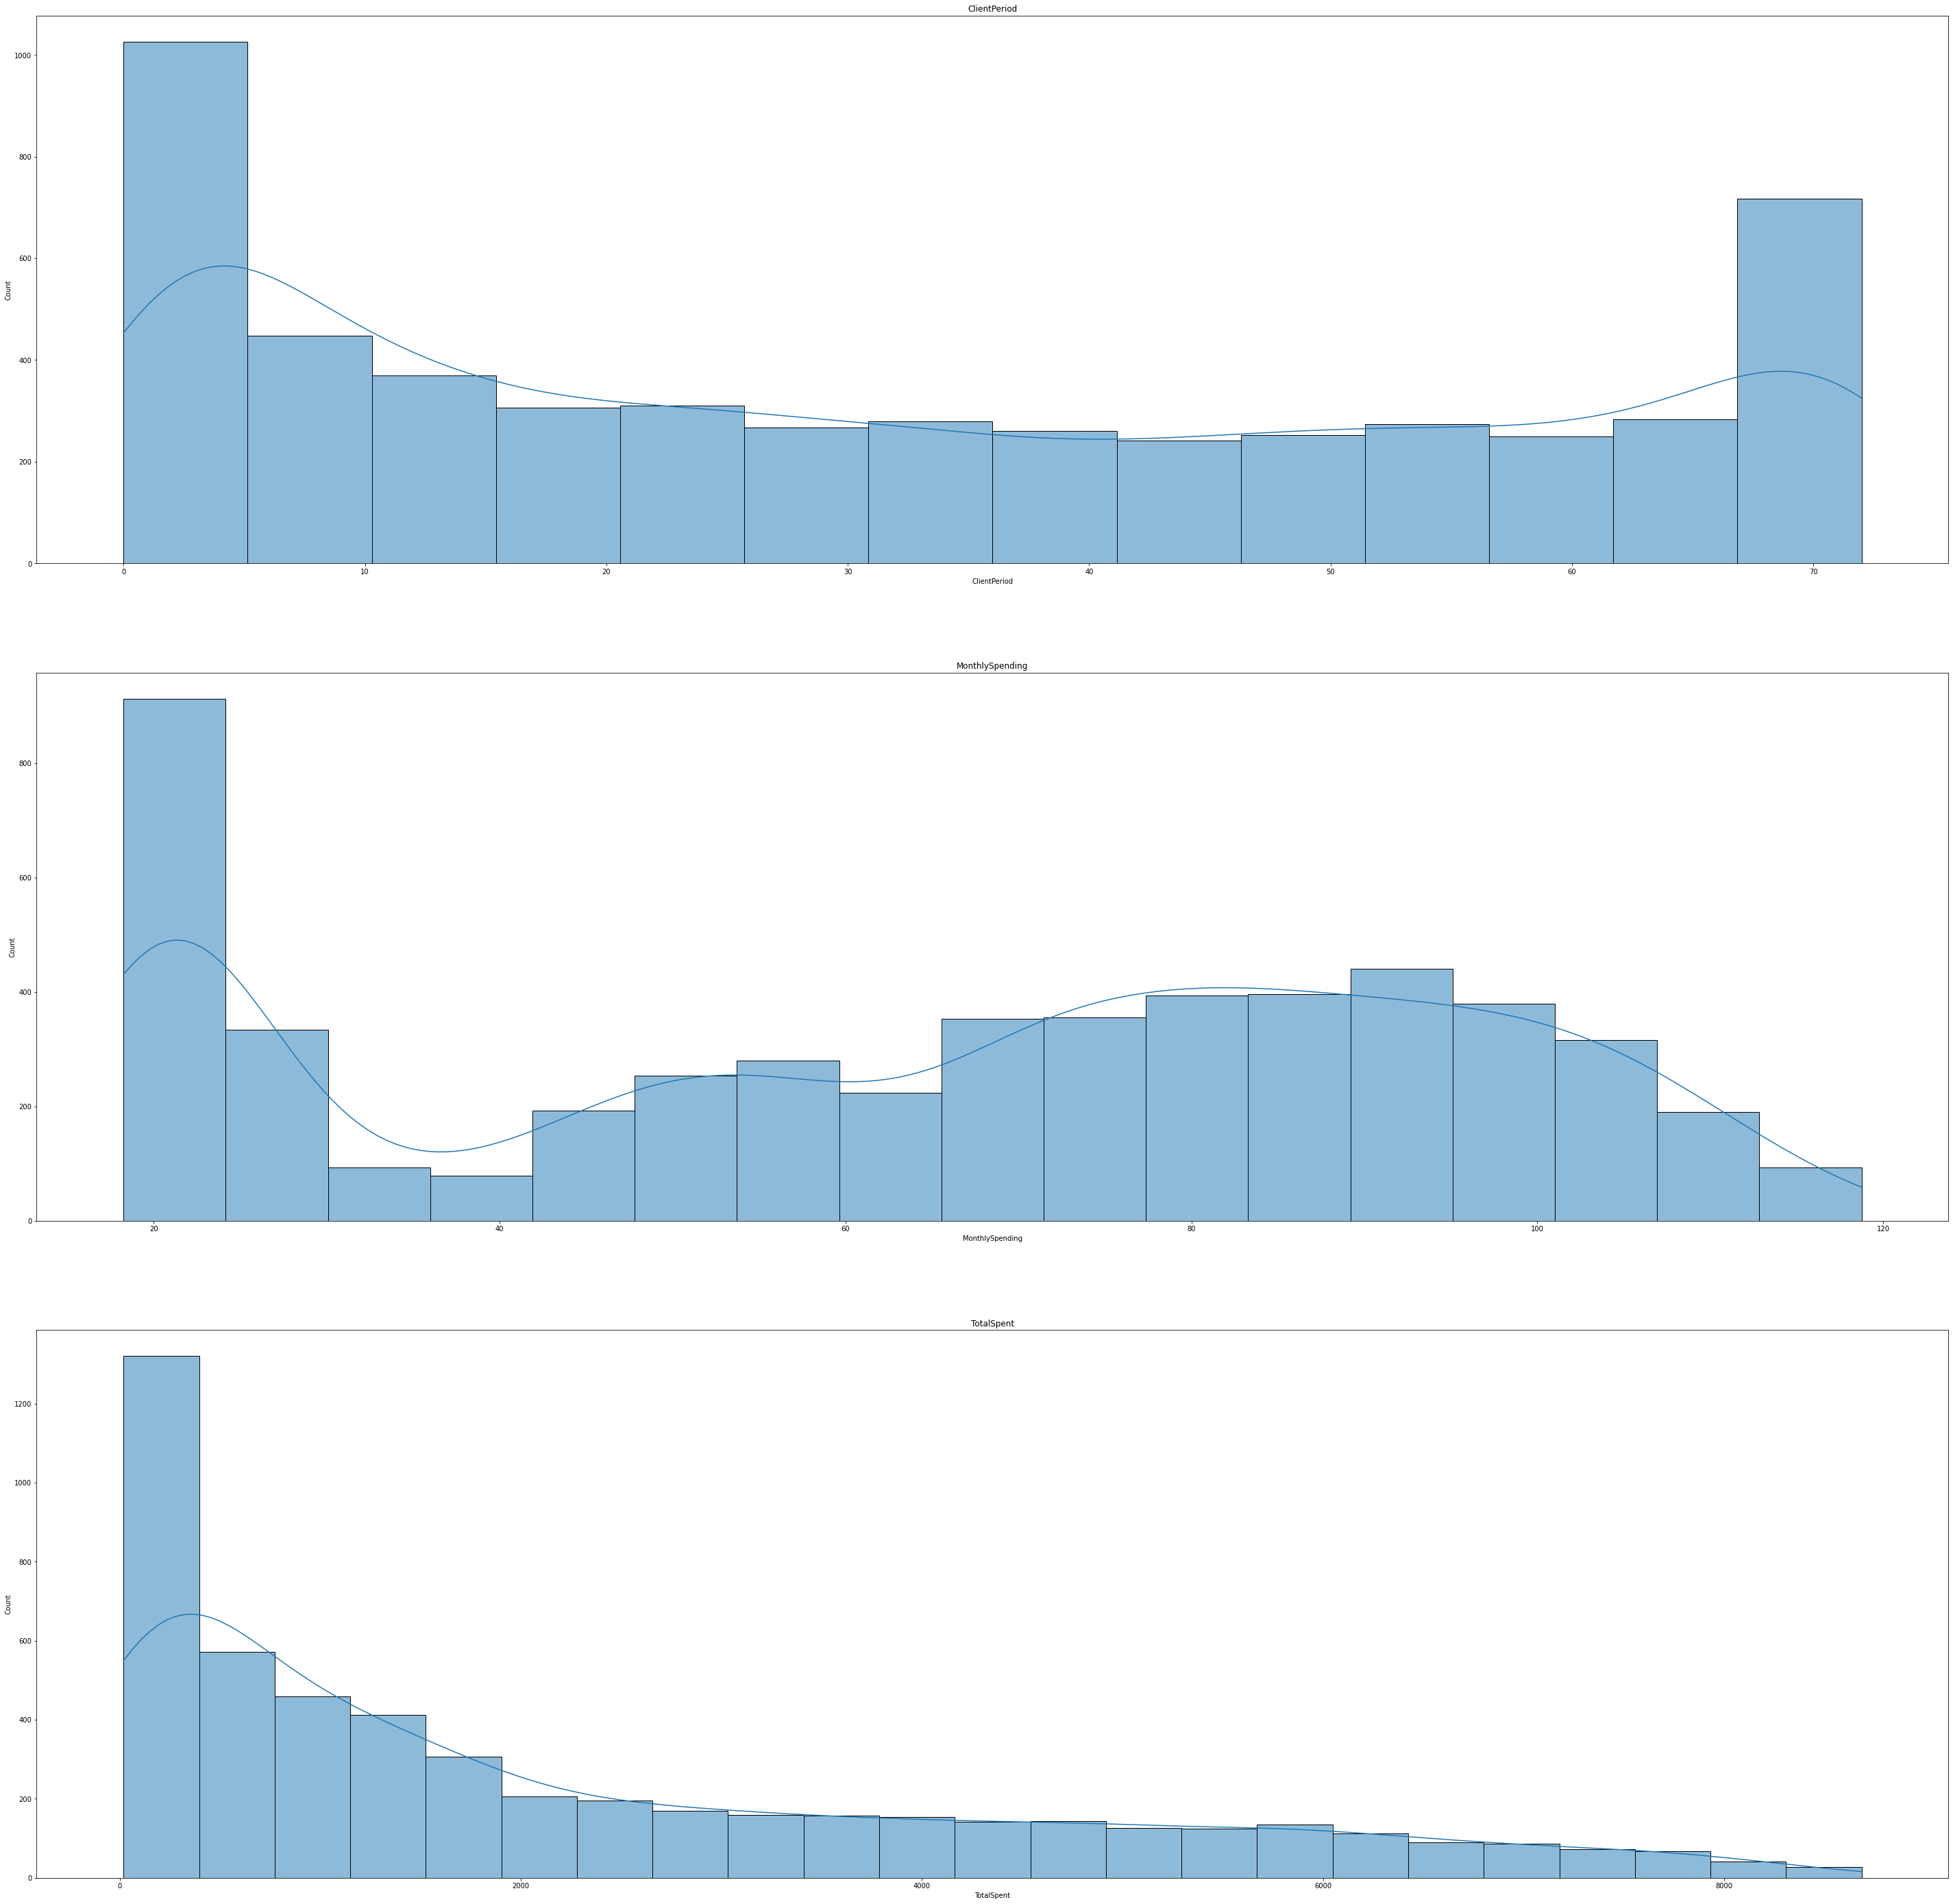

In [ ]:
import seaborn as sns


fig, axis = plt.subplots(len(num_cols), figsize=(50, 50))

for index, colname in enumerate(num_cols):
  sns.histplot(data[colname], ax = axis[index], kde=True).set(title=colname)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

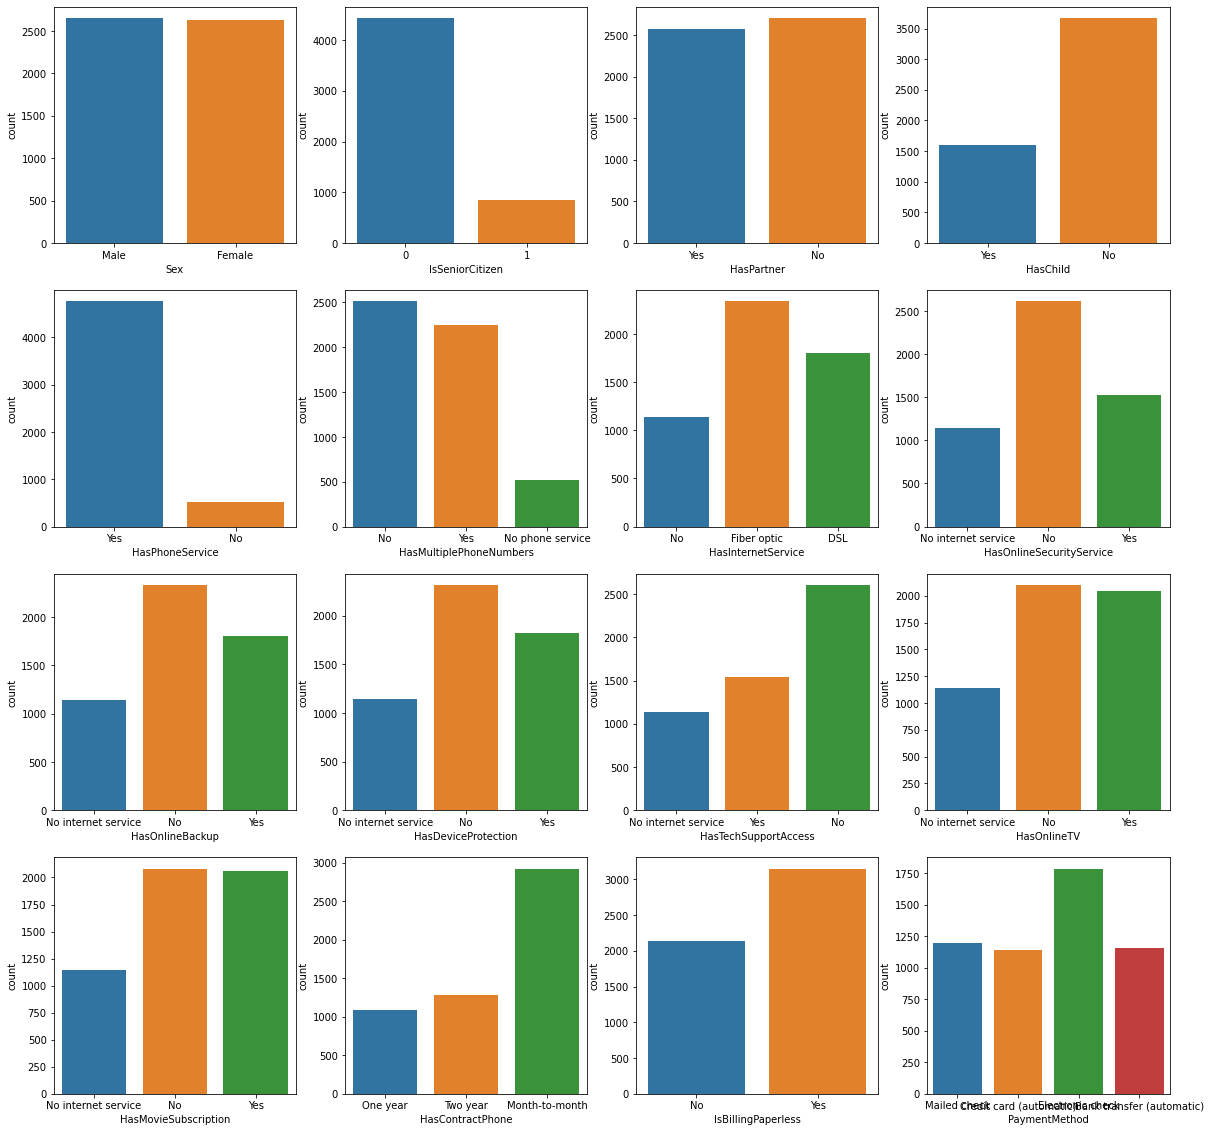

In [ ]:
fig, axis = plt.subplots(4, 4, figsize=(20, 20))

for index, colname in enumerate(cat_cols):
  sns.countplot(data[colname], ax=axis[index//4][index%4])

None

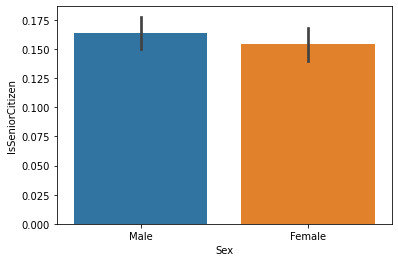

In [ ]:
sns.barplot(data=data, x='Sex', y='IsSeniorCitizen');


<BarContainer object of 2 artists>

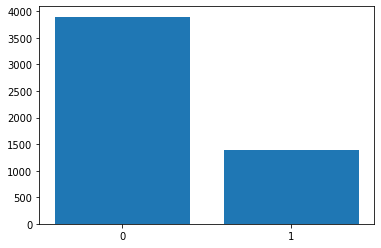

In [ ]:
counts = data[target_col].value_counts().values
indexes = [0, 1]

plt.xticks(indexes)
plt.bar(indexes, counts)

# Oversampling. Избавимся от 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = data[feature_cols]
y = data[target_col]
X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
data = pd.concat([X_resampled, y_resampled], axis=1)

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Заменим категориальные фичи


In [ ]:
dm = pd.get_dummies(data[cat_cols], drop_first=True)

X = pd.concat([data[num_cols], dm], axis=1).copy()

y = data['Churn'].copy()

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  7796 non-null   float64
 1   MonthlySpending                               7796 non-null   float64
 2   TotalSpent                                    7796 non-null   float64
 3   IsSeniorCitizen                               7796 non-null   int64  
 4   Sex_Male                                      7796 non-null   uint8  
 5   HasPartner_Yes                                7796 non-null   uint8  
 6   HasChild_Yes                                  7796 non-null   uint8  
 7   HasPhoneService_Yes                           7796 non-null   uint8  
 8   HasMultiplePhoneNumbers_No phone service      7796 non-null   uint8  
 9   HasMultiplePhoneNumbers_Yes                   7796 non-null   u

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
scale = StandardScaler()

X_train[num_cols] = scale.fit_transform(X_train[num_cols])
X_test[num_cols] = scale.fit_transform(X_test[num_cols])

Попробуем обычную Лог регрессию

In [ ]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)
pred = model.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, pred)

score

0.8379467368074962

И с поиском по сетке

In [ ]:
grids = [100, 10, 1, 0.1, 0.01, 0.001]
param_names = 'C'


model2 = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                     param_grid={'C': grids}, cv=5, scoring='roc_auc', 
                     n_jobs=-1, verbose=10)

model2.fit(X_train, y_train)
pred = model2.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, pred)

score

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.8377280946901199

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

neigbots_grid = [2, 5, 10]

knn_cv = GridSearchCV(estimator=knn, param_grid={'n_neighbors': neigbots_grid},
                      cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

knn_cv.fit(X_train, y_train)
pred = knn_cv.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, pred)

score

Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.8478982409995068

Лучшее качество показал KNN: 0.8486

## Применение градиентного бустинга 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

n_estimators = [200, 300, 400, 500]
lrs = [0.1]
max_depth = [3, 4, 6]

CB_classifier = CatBoostClassifier(loss_function='Logloss', 
                                   cat_features=cat_cols, 
                                   bootstrap_type = 'Bayesian',
                                   silent=True, task_type='GPU')

grid = {'n_estimators': n_estimators,
        'learning_rate': lrs,
        'max_depth': max_depth
        }

GridSearch_m = GridSearchCV(estimator=CB_classifier, param_grid = grid, cv = 5, scoring='roc_auc')
GridSearch_m.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff30e6c4d50>,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4, 6],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='roc_auc')

In [ ]:
model3 = GridSearch_m.best_estimator_
roc_auc_score(y_test, model3.predict_proba(X_test)[:, 1])


0.903102087785632

In [ ]:
model3.get_params()

{'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'silent': True,
 'task_type': 'GPU',
 'bootstrap_type': 'Bayesian',
 'max_depth': 6,
 'n_estimators': 400,
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod']}

Лушчее качество: 0.9610
Лучшие параметры:
'loss_function': 'Logloss',
 'eval_metric': 'AUC:hints=skip_train~false',
 'bootstrap_type': 'Bayesian',
 'random_state': 42,
 'early_stopping_rounds': 300,
 'min_data_in_leaf': 100,
 'depth': 7,
 'iterations': 500,
 'learning_rate': 0.05,
 'grow_policy': 'Lossguide',
 'score_function': 'L2'

# Предсказания

In [ ]:
best_model = model3

In [ ]:
data = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
if best_model != model3:
  for col in data:
      if data[col].dtype == object:
          data[col] = data[col].apply(func=lambda x: None if (x is None or str.isspace(x) or not x) else x)

  data['TotalSpent'].fillna(data['MonthlySpending'], inplace=True)


  for col in num_cols:
      data[col] = data[col].apply(float)
      
  dm = pd.get_dummies(data[cat_cols], drop_first=True)

  X_test = pd.concat([data[num_cols], dm], axis=1).copy()

else:
  X_test = data

In [ ]:
final_test_pred = best_model.predict_proba(X_test)[:, 1]

submission['Churn'] = final_test_pred
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.